In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime,date
from scipy.interpolate import make_interp_spline, BSpline

%matplotlib inline

import os

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf

In [2]:
def Reverse(lst): 
    return [ele for ele in reversed(lst)]

In [3]:
path='data/COVID19/JHU/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series'
confirmed_fn=os.path.join(path,'time_series_covid19_confirmed_global.csv')
deaths_fn=os.path.join(path,'time_series_covid19_deaths_global.csv')
recovered_fn=os.path.join(path,'time_series_covid19_recovered_global.csv')

In [4]:
confirmed_fn

'data/COVID19/JHU/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [5]:
df_confirmed = pd.read_csv(confirmed_fn)
df_deaths = pd.read_csv(deaths_fn)
df_recovered = pd.read_csv(recovered_fn)

In [6]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,743,743,745,745,747,748,750,751,751,752
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,27,27,30,35,35,35,36,36,36


In [7]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_recovered = df_recovered.rename(columns={"Province/State":"state","Country/Region": "country"})

In [8]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_recovered.loc[df_recovered['country'] == "US", "country"] = "USA"

df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_recovered.loc[df_recovered['country'] == 'Korea, South', "country"] = 'South Korea'

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_recovered.loc[df_recovered['country'] == 'Taiwan*', "country"] = 'Taiwan'

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_recovered.loc[df_recovered['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_recovered.loc[df_recovered['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_recovered.loc[df_recovered['country'] == "Reunion", "country"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_recovered.loc[df_recovered['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_recovered.loc[df_recovered['country'] == 'Bahamas, The', "country"] = 'Bahamas'

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_recovered.loc[df_recovered['country'] == 'Gambia, The', "country"] = 'Gambia'

# getting all countries
countries = np.asarray(df_confirmed["country"])

In [9]:
df_active = df_confirmed.copy()
df_active.iloc[:,5:] = df_active.iloc[:,5:] - df_recovered.iloc[:,5:] - df_deaths.iloc[:,5:]
df_active.head(5)

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0.0,0.0,0.0,0.0,0.0,...,1542.0,1627.0,1847.0,1957.0,2066.0,2274.0,2407.0,2708.0,2830.0,2989.0
1,NaN,Albania,41.1533,20.1683,0,0.0,0.0,0.0,0.0,0.0,...,289.0,281.0,272.0,263.0,239.0,233.0,229.0,219.0,206.0,206.0
2,NaN,Algeria,28.0339,1.6596,0,0.0,0.0,0.0,0.0,0.0,...,1561.0,1702.0,1777.0,1880.0,1964.0,2075.0,2185.0,2301.0,2324.0,2376.0
3,NaN,Andorra,42.5063,1.5218,0,0.0,0.0,0.0,0.0,0.0,...,304.0,278.0,235.0,234.0,231.0,210.0,206.0,191.0,184.0,179.0
4,NaN,Angola,-11.2027,17.8739,0,0.0,0.0,0.0,0.0,0.0,...,19.0,18.0,18.0,17.0,22.0,22.0,22.0,23.0,23.0,23.0


In [10]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)
df_recovered = df_recovered.replace(np.nan, '', regex=True)
df_active = df_active.replace(np.nan, '', regex=True)

In [11]:
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

In [12]:
confirmed_cases =  df_confirmed.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
recovered_cases = df_recovered.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
deaths = df_deaths.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
active_cases = df_active.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]

confirmed_cases.name = "Confirmed Cases"
recovered_cases.name = "Recovered Cases"
deaths.name = "Deaths Reported"
active_cases.name = "Active Cases"
df_countries_cases = pd.DataFrame([confirmed_cases,recovered_cases,deaths,active_cases]).transpose()

In [13]:
df_countries_cases.head()

,Confirmed Cases,Recovered Cases,Deaths Reported,Active Cases
country,,,,
Afghanistan,3563,468,106,0
Albania,842,605,31,0
Algeria,5182,2323,483,0
Andorra,752,526,47,0
Angola,36,11,2,0


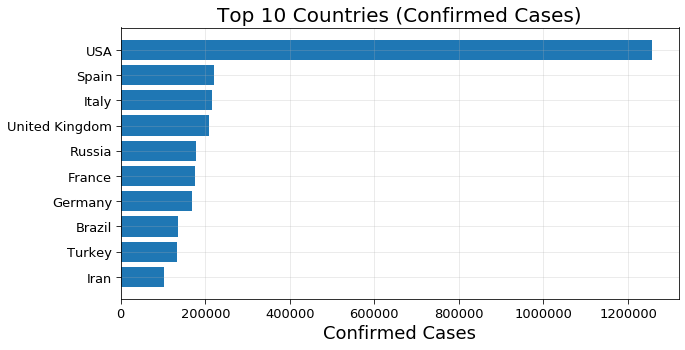

In [14]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.barh(df_countries_cases.sort_values('Confirmed Cases')["Confirmed Cases"].index[-10:],df_countries_cases.sort_values('Confirmed Cases')["Confirmed Cases"].values[-10:],)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
# plt.savefig('Top 10 Countries (Confirmed Cases).png')
plt.grid(alpha=0.3)

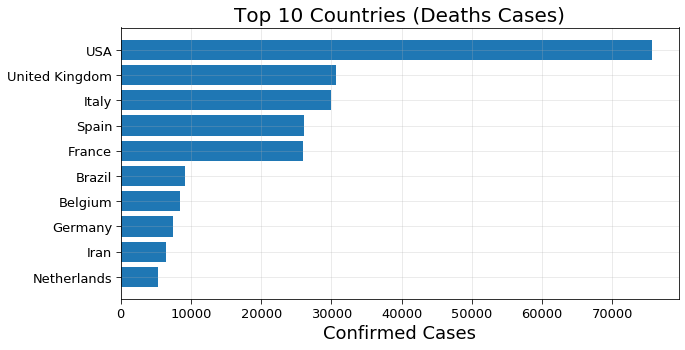

In [15]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.barh(df_countries_cases.sort_values('Deaths Reported')["Deaths Reported"].index[-10:],df_countries_cases.sort_values('Deaths Reported')["Deaths Reported"].values[-10:])
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
# plt.savefig('Top 10 Countries (Deaths Cases).png')
plt.grid(alpha=0.3)

In [16]:
Top10_Deaths=list(df_countries_cases.sort_values('Deaths Reported')["Deaths Reported"].index[-10:])
Top10_Confirmed=list(df_countries_cases.sort_values('Confirmed Cases')["Confirmed Cases"].index[-10:])
Top10_Recovered=list(df_countries_cases.sort_values('Recovered Cases')["Recovered Cases"].index[-10:])
Top10_Active=list(df_countries_cases.sort_values('Active Cases')["Active Cases"].index[-10:])

In [17]:
Top10_Confirmed=Reverse(list(df_countries_cases.sort_values('Confirmed Cases')["Confirmed Cases"].index[-10:]))

In [18]:
confirmed_series =  df_confirmed.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).loc[Top10_Confirmed].T
recovered_series = df_recovered.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).loc[Top10_Confirmed].T
deaths_series = df_deaths.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).loc[Top10_Recovered].T
active_series = df_active.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).loc[Top10_Active].T

In [19]:
#https://plotly.com/~ziwang/69/
@interact
def top10_confirmed_country():
    confirmed_series.iplot(xTitle='Date', yTitle='Convirmed Cases',title='Top 10 country: Confirmed COVID-19 Cases',theme='solar')

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [20]:

Top21_Confirmed=Reverse(list(df_countries_cases.sort_values('Confirmed Cases')["Confirmed Cases"].index[-51:]))
print(Top21_Confirmed)

['USA', 'Spain', 'Italy', 'United Kingdom', 'Russia', 'France', 'Germany', 'Brazil', 'Turkey', 'Iran', 'China', 'Canada', 'Peru', 'India', 'Belgium', 'Netherlands', 'Saudi Arabia', 'Ecuador', 'Switzerland', 'Mexico', 'Portugal', 'Pakistan', 'Sweden', 'Chile', 'Ireland', 'Singapore', 'Belarus', 'Qatar', 'Israel', 'United Arab Emirates', 'Austria', 'Japan', 'Poland', 'Romania', 'Ukraine', 'Indonesia', 'Bangladesh', 'South Korea', 'Philippines', 'Denmark', 'Serbia', 'Colombia', 'Dominican Republic', 'South Africa', 'Norway', 'Czechia', 'Egypt', 'Panama', 'Australia', 'Kuwait', 'Malaysia']


In [21]:
confirmed_series_21 =  df_confirmed.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).loc[Top21_Confirmed].T

In [22]:
#https://plotly.com/~ziwang/136/
@interact
def plot_top20country_confirmed_cases():
    confirmed_series_21.iplot(subplots=True, shape=(17,3), shared_xaxes=True, fill=False,
                              subplot_titles=True,legend=False, xTitle="",yTitle="",
                              title='Top 51 countries: Confirmed COVID-19 Cases',theme='pearl')

interactive(children=(Output(),), _dom_classes=('widget-interact',))